# Credit Card Fraud Machine Learning Model

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Wrangling](#data-wrangling)
        - [Cleaning Headers](#cleaning-headers)
        - [Cleaning Column Elements](#cleaning-column-elements)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

[project intro]

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.dummy import DummyClassifier

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('creditcard.csv', sep=',')
except:
    df = pd.read_csv('/datasets/creditcard.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-Processing Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

1081

In [5]:
# Removing duplicates
df = df.drop_duplicates()

# Checking for duplicates
print(df.duplicated().sum())

0


[Back to Table of Contents](#back)

### Missing Values

In [6]:
# Checking for null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

[Back to Table of Contents](#back)

### Data Wrangling

#### Cleaning Headers

In [7]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#checking for snakecase format
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Renaming column names to snake_case format
df = df.rename(columns={'Time': 'time',
                        'V1': 'v1',
                        'V2': 'v2',
                        'V3': 'v3',
                        'V4': 'v4',
                        'V5': 'v5',
                        'V6': 'v6',
                        'V7': 'v7',
                        'V8': 'v8',
                        'V9': 'v9',
                        'V10': 'v10',
                        'V11': 'v11',
                        'V12': 'v12',
                        'V13': 'v13',
                        'V14': 'v14',
                        'V15': 'v15',
                        'V16': 'v16',
                        'V17': 'v17',
                        'V18': 'v18',
                        'V19': 'v19',
                        'V20': 'v20',
                        'V21': 'v21',
                        'V22': 'v22',
                        'V23': 'v23',
                        'V24': 'v24',
                        'V25': 'v25',
                        'V26': 'v26',
                        'V27': 'v27',
                        'V28': 'v28',
                        'Amount': 'amount',
                        'Class': 'class'})
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

[Back to Table of Contents](#back)

## Exploratory Data Analysis

In [10]:
df['class'].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [11]:
# Labeling the classes
not_fraud = df[df['class'] == 0]
fraud = df[df['class'] == 1]

In [12]:
df.groupby('class').agg({'amount': ['count', 'sum']})

amount             
        count          sum
class                     
0      283253  25043410.29
1         473     58591.39

In [13]:
# # Splitting the total dataset into a training dataset, a testing dataset, and a validation dataset 
# for our machine learning model set at a 3:1:1 ratio using the train_test_split function
train_valid, test = train_test_split(df,
                                     test_size=0.20,
                                     random_state=12345)

train, valid = train_test_split(train_valid,
                                test_size=0.25,
                                random_state=12345)

print(train.shape, '%.2f'% round(len(train) / (len(train) + len(valid) + len(test)), 1))
print(valid.shape, '%.2f'% round(len(valid) / (len(train) + len(valid) + len(test)), 1))
print(test.shape, '%.2f'% round(len(test) / (len(train) + len(valid) + len(test)), 1))

(170235, 31) 0.60
(56745, 31) 0.20
(56746, 31) 0.20


Observation:

- About 60% of the data has been allocated into the training dataset, and about 20% for the validation and test datasets

In [14]:
# Separating our target column from the feature columns of each analysis groups
features_train = train.drop(['class'], axis=1)
target_train = train['class']

features_valid = valid.drop(['class'], axis=1)
target_valid = valid['class']

features_test = test.drop(['class'], axis=1)
target_test = test['class']

[Back to Table of Contents](#back)

In [15]:
# Creating a function that can calculate the accuracy score for a decision tree based on its max_depth parameter
def dectree_func (depth):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predictions_valid = tree_model.predict(features_valid)
    return accuracy_score(target_valid, predictions_valid)

In [16]:
# Creating a new dataframe to find the optimal max depth value for the optimal accuracy score
dtree = pd.DataFrame({1: [dectree_func(1)],
                      2: [dectree_func(2)],
                      3: [dectree_func(3)],
                      4: [dectree_func(4)],
                      5: [dectree_func(5)],
                      6: [dectree_func(6)],
                      7: [dectree_func(7)],
                      8: [dectree_func(8)],
                      9: [dectree_func(9)],
                      10: [dectree_func(10)]})

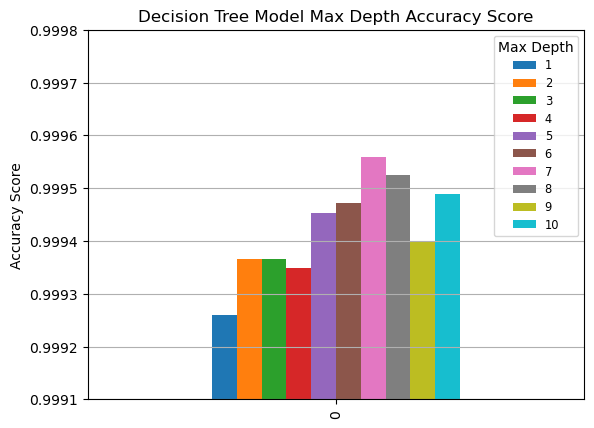

In [17]:
# Visualizing decision tree model accuracy score
dtree.plot(kind='bar')
plt.title('Decision Tree Model Max Depth Accuracy Score')
plt.ylim([0.9991, 0.9998])
plt.ylabel('Accuracy Score')
plt.legend(title='Max Depth',
           fontsize='8.25',
           loc='upper right')
plt.grid(axis='y')
plt.show()

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

syntax:
[Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [Kaggle](URL of the dataset).

example:
Tatman, R. (2017, November). R vs. Python: The Kitchen Gadget Test, Version 1. Retrieved December 20, 2017 from https://www.kaggle.com/rtatman/r-vs-python-the-kitchen-gadget-test.

[Back to Table of Contents](#back)